In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
#warnings.filterwarnings('ignore')

In [19]:

df = pd.read_csv('data.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [20]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [22]:
df.isnull().mean()*100

,0
id,0.0
diagnosis,0.0
radius_mean,0.0
texture_mean,0.0
perimeter_mean,0.0
area_mean,0.0
smoothness_mean,0.0
compactness_mean,0.0
concavity_mean,0.0
concave points_mean,0.0


In [ ]:
#Standard scaling brings all features to a common scale without distorting differences
#in the ranges of values. Standard scaling is a crucial preprocessing step that ensures our machine
#learning models perform optimally by normalizing feature scales, improving algorithm performance,
#preventing feature dominance, and reducing numerical instability.

<Axes: ylabel='symmetry_mean'>

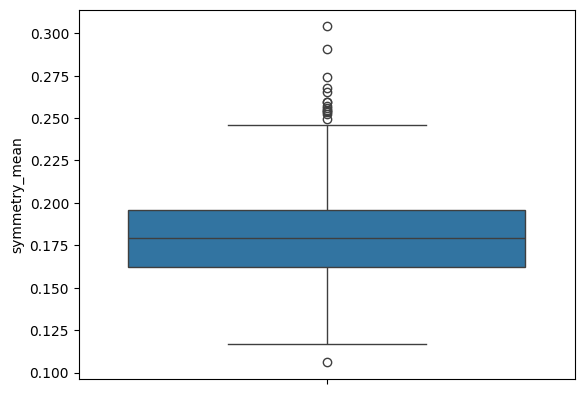

In [48]:
sns.boxplot(df['symmetry_mean'])

In [49]:
df['symmetry_mean'].describe()

,symmetry_mean
count,569.000000
mean,0.181162
std,0.027414
min,0.106000
25%,0.161900
50%,0.179200
75%,0.195700
max,0.304000


In [ ]:
#Z score tells how many standard deviations away data point is from the mean.
#In a normal distribution it is estimated that 68% of the data points lie between +/- 1 standard deviation. 95% of the data points lie between +/- 2 standard deviation 99.7% of the data points lie between +/- 3 standard deviation.
#If the z score of a data point is more than 3, it indicates that the data point is quite different from the other data points.

In [50]:
mean=print('MEAN value of the above column',df['symmetry_mean'].mean())
std=print('STD DEVIATION value of the above column',df['symmetry_mean'].std())
min=print('Min value of the above column',df['symmetry_mean'].min())
max=print('Max value of the above column',df['symmetry_mean'].max())

MEAN value of the above column 0.18116186291739894
STD DEVIATION value of the above column 0.027414281336035712
Min value of the above column 0.106
Max value of the above column 0.304


In [51]:
upperlimit=print("Highest allowed",df["symmetry_mean"].mean()+3*df['symmetry_mean'].std())
lowerlimit=print("Lowest allowed",df["symmetry_mean"].mean()-3*df['symmetry_mean'].std())

Highest allowed 0.2634047069255061
Lowest allowed 0.0989190189092918


In [52]:
df['symmetry_mean']=np.where(df['symmetry_mean']>upperlimit,upperlimit,np.where(df['symmetry_mean']<lowerlimit,lowerlimit,df['symmetry_mean']))

In [53]:
df['symmetry_mean'].describe()

,symmetry_mean
count,569.0000
unique,432.0000
top,0.1714
freq,4.0000


<Axes: ylabel='area_se'>

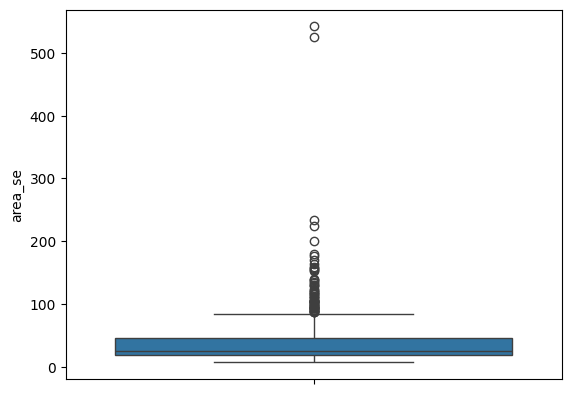

In [54]:
sns.boxplot(df['area_se'])

In [60]:
df['area_se'].describe()

,area_se
count,569.000000
mean,40.337079
std,45.491006
min,6.802000
25%,17.850000
50%,24.530000
75%,45.190000
max,542.200000


In [ ]:
#The Interquartile Range (IQR) method stands as a robust and non-parametric technique for identifying outliers within a dataset.
#Unlike the Z-Score method, the IQR method doesn’t rely on distributional assumptions, making it versatile and well-suited for various distribution shapes. By capturing the range within which the middle 50% of the data resides — specifically, the difference between the third quartile (Q3) and the first quartile (Q1) — the IQR method proves resilient in the face of skewed, bimodal, or unevenly distributed data.
#Its ability to adapt to different shapes and resist the influence of extreme values positions the IQR method as a reliable tool for finding the outliers

In [55]:
#finding IQR

percentile25=df['area_se'].quantile(0.25)
percentile75=df['area_se'].quantile(0.75)
iqr=percentile75-percentile25
upperlimit=percentile75*1.58*iqr
lowerlimit=percentile25-1.5*iqr

In [62]:
dff=df['area_se']=np.where(df['area_se']>upperlimit,upperlimit,np.where(df['area_se']<lowerlimit,lowerlimit,df['area_se']))

In [69]:
# Drop unnecessary columns
df_cleaned = df.drop(columns=["id", "Unnamed: 32"], errors='ignore')

# Convert categorical target column ('diagnosis') to numerical (0 = Benign, 1 = Malignant)
df_cleaned["diagnosis"] = df_cleaned["diagnosis"].map({"M": 1, "B": 0})


In [ ]:
# Normalize using Min-Max Scaling
scaler = MinMaxScaler()
df_final.iloc[:, 1:] = scaler.fit_transform(df_final.iloc[:, 1:])


In [ ]:
# Standardize using Z-score normalization
standard_scaler = StandardScaler()
df_standardized = df_final.copy()
df_standardized.iloc[:, 1:] = standard_scaler.fit_transform(df_final.iloc[:, 1:])



In [ ]:
# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker="o", linestyle="--", color="b")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal K")
plt.show()


In [ ]:
#The k-means clustering algorithm operates by categorizing data points into clusters by using a mathematical distance measure, usually euclidean, from the cluster center. The objective is to minimize the sum of distances between data points and their assigned clusters. Data points that are nearest to a centroid are grouped together within the same category. A higher k value, or the number of clusters, signifies smaller clusters with greater detail, while a lower k value results in larger clusters with less detail.

In [ ]:
# Apply PCA for 2D visualization
#K-means is an iterative, centroid-based clustering algorithm that partitions a dataset into similar groups based on the distance between their centroids. The centroid, or cluster center, is either the mean or median of all the points within the cluster depending on the characteristics of the data.
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_standardized.iloc[:, 1:-1])  # Excluding diagnosis & cluster columns
df_standardized["PCA1"] = pca_result[:, 0]
df_standardized["PCA2"] = pca_result[:, 1]


In [ ]:
# Scatter plot of clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x="PCA1", y="PCA2", hue=df_standardized["Cluster"], palette="viridis", data=df_standardized, alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title(f"K-Means Clustering Visualization (K={optimal_k})")
plt.legend(title="Cluster")
plt.show()